In [48]:
# importing the necessary libraries 

import pandas as pd
import numpy as np

In [49]:
# loading the dataset 

df = pd.read_csv(r'H:\HateSpeechDetection\labeled_data.csv')

In [50]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [51]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [53]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [54]:
#map the columns for hate speech
df['labels'] = df['class'].map({0: 'Hate Speech', 1: 'Offensive Language', 2: 'Normal'})


In [55]:
print(df.head(10))

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   
5           5      3            1                   2        0      1   
6           6      3            0                   3        0      1   
7           7      3            0                   3        0      1   
8           8      3            0                   3        0      1   
9           9      3            1                   2        0      1   

                                               tweet              labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...              Normal  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn

In [56]:
#splitting the columns
df = df[['tweet', 'labels']]

In [57]:
print(df.head())

                                               tweet              labels
0  !!! RT @mayasolovely: As a woman you shouldn't...              Normal
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Offensive Language


In [58]:
#importing Natural Language Toolkit, Regular Expressions,String
import nltk
import re
import string

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
#Import stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [61]:
#Import Stemming
stemmer = nltk.SnowballStemmer("english")

In [62]:
#actual cleaning data
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
#removing stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text = ' '.join(text)
#applying stemming
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text

In [63]:
df.loc[:, 'tweet'] = df['tweet'].apply(clean)

In [64]:
df

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,Normal
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,Normal
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [65]:
# creating arrays to represent tweets and labels to split data
x = np.array(df['tweet'])
y = np.array(df['labels'])

In [66]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [67]:
y

array(['Normal', 'Offensive Language', 'Offensive Language', ...,
       'Offensive Language', 'Offensive Language', 'Normal'], dtype=object)

In [68]:
#Buliding up ML Model 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [69]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=42)

# Vectorize text data using CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


In [70]:
X_train


<16852x19952 sparse matrix of type '<class 'numpy.int64'>'
	with 134588 stored elements in Compressed Sparse Row format>

In [71]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Model training successful!")


Model training successful!


In [72]:
y_pred = dtc.predict(X_test)

In [73]:
#validating using confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)

In [74]:
conf_matrix

array([[ 153,   38,  258],
       [  35, 1113,  193],
       [ 240,  222, 5679]], dtype=int64)

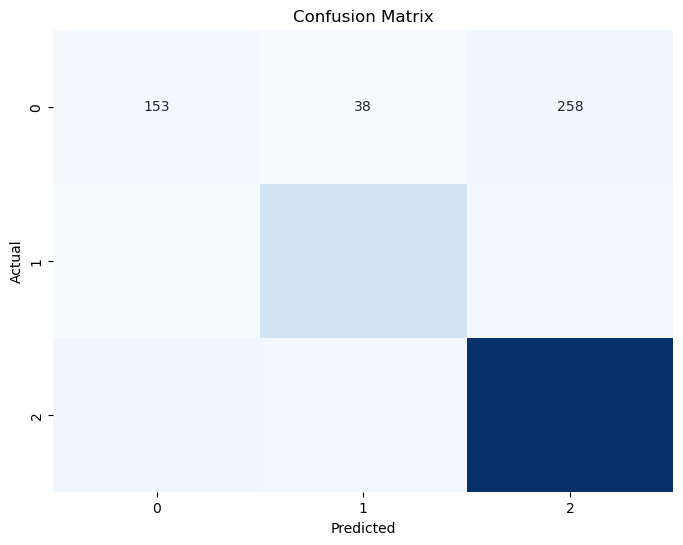

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8756777203379145

In [77]:
# Predicting on new data from CSV file
new_df = pd.read_csv(r'H:\HateSpeechDetection\sample_tweets_only.csv')
new_df

,tweet
0,"I hate people like you, you're disgusting!"
1,"You are the worst, just shut up!"
2,What a beautiful day to enjoy the sunshine.
3,You're a disgrace to society.
4,"That idea is incredibly dumb, just stop."
5,I hope everyone has a wonderful weekend!
6,Your opinions are trash and nobody likes you.
7,Why are you so annoying all the time?
8,Lets kill all this bitches!
9,The concert last night was absolutely fantastic!


In [78]:
new_df['tweet'] = new_df['tweet'].apply(clean)
new_df

,tweet
0,hate peopl like your disgust
1,worst shut
2,beauti day enjoy sunshin
3,your disgrac societi
4,idea incred dumb stop
5,hope everyon wonder weekend
6,opinion trash nobodi like
7,annoy time
8,let kill bitch
9,concert last night absolut fantast


In [87]:
new_X = cv.transform(new_df['tweet']).toarray()
new_predictions = dtc.predict(new_X)

In [88]:
new_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
# Display the predictions
new_df['Prediction'] = new_predictions
print(new_df[['tweet', 'Prediction']])

                                tweet          Prediction
0        hate peopl like your disgust              Normal
1                          worst shut  Offensive Language
2            beauti day enjoy sunshin  Offensive Language
3                your disgrac societi  Offensive Language
4               idea incred dumb stop  Offensive Language
5         hope everyon wonder weekend              Normal
6           opinion trash nobodi like              Normal
7                          annoy time              Normal
8                      let kill bitch  Offensive Language
9  concert last night absolut fantast              Normal


In [95]:
#checking as per the prerequistie vedio
sample ="Lets unite and kill all the people who are protestingagainst the government"
sample = clean(sample)

In [96]:
sample

'let unit kill peopl protestingagainst govern'

In [97]:
d1 = cv.transform([sample]).toarray()

In [98]:
d1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
dtc.predict(d1)

array(['Hate Speech'], dtype=object)